# **Проект Спринт 1. Сканирование кубического мира: детекция мобов и объектов в Minecraft с Faster R-CNN и YOLO**

# Установка библиотек

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Скачивание датасета и подготовка к обучению

In [ ]:
import shutil
shutil.copyfile('/content/drive/MyDrive/minecraft_with_labels.zip','/content/minecraft.zip')

'/content/minecraft.zip'

In [ ]:
!unzip minecraft.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: images/train/grass_desert_-_cow_3_1880_jpg.rf.560ef06171e5179db94b0c693f51db22.xml  
  inflating: images/train/2023-04-03_20_38_25_png.rf.931c02deae522e63cb1b6a14459dce48.jpg  
  inflating: images/train/image28_png_jpg.rf.95d2daa585727e0eeb03334bcce3094a.jpg  
  inflating: images/train/2023-03-28_00_01_55_png.rf.e0730b8e4548687e7ac76669376f980a.xml  
  inflating: images/train/enderman-38-_png.rf.875e2f70c68c9550346e9b79a24ff1d2.xml  
  inflating: images/train/Screenshot-167-_png.rf.28685a6be82d20af5327221b2f6c7a03.jpg  
  inflating: images/train/2023-03-28_00_08_26_png.rf.b87bc188f139bb76ed41527a93808a00.xml  
  inflating: images/train/creeper00052_png.rf.cac060a27447594a4fe88e32f3ec628d.xml  
  inflating: images/train/98_png_jpg.rf.ec9b2e51e0750a6d08e15d3e3690add0.jpg  
  inflating: images/train/2023-03-27_23_19_30_png.rf.2ba3223368b6e70d019305618d65a96b.xml  
  inflating: images/train/08_cave_0_jpg.rf.4a

In [ ]:
cd mmdetection

/content/mmdetection


In [ ]:
# Создайте папку для чекпоинтов
!mkdir checkpoints
# Создайте папку для чекпоинтов
!mkdir checkpoints
# Создайте папку для результатов
!mkdir artifacts
!mkdir artifacts/fcos
!mkdir artifacts/yolo

mkdir: cannot create directory ‘checkpoints’: File exists


In [ ]:
!mkdir minecraft

In [ ]:
import os
# Структура проекта:
folders_to_create=[
    'configs/fcos',
    'artifacts/fcos',
    'artifacts/yolo',
    'artifacts/metrics',
    'artifacts/inference/fcos',
    'artifacts/inference/yolo',
    'artifacts/videos',
    'checkpoints',
    'datasets'
]

# Создаём целевые папки, если их нет
for folder in folders_to_create:
  try:
    os.makedirs(folder, exist_ok=True)
  except OSError as e:
    print(f"Error: {e.strerror}. The directory might be in use or you lack permissions.")

In [ ]:
# Создаём YAML
dataset_dir = 'datasets/minecraft/data.yaml'
cls_names=['bee', 'chicken', 'cow', 'creeper', 'enderman', 'fox', 'frog', 'ghast',
'goat', 'llama', 'pig', 'sheep', 'skeleton', 'spider', 'turtle', 'wolf', 'zombie' ]

yaml_content = f"""
path: 'datasets/minecraft'  # Путь к датасету
train: images/train
val: images/valid
test: images/test

nc: {len(cls_names)}  # Количество классов
names: {cls_names}    # Имена классов
"""

yaml_path = dataset_dir
with open(yaml_path, 'w') as f:
    f.write(yaml_content)


# Обучение модели

In [ ]:
model = YOLO('yolov8s.pt')

results = model.train(
        data=dataset_dir,   # Путь к нашему "паспорту" датасета
        epochs=100,                 # Количество эпох
        imgsz=512,                  # Размер изображений


        batch=8,                   # Размер батча. Уменьшайте, если не хватает видеопамяти.
        device='',                   # ID видеокарты (0) или 'cpu'.
        name='minecraft_yolo_run', # Имя папки эксперимента.
        patience=20,                # Количество эпох без улучшения для ранней остановки.
    )

print("Обучение завершено. Результаты сохранены в папке:", results.save_dir)


Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/minecraft/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=minecraft_yolo_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0,

In [ ]:

model = YOLO('/content/runs/detect/minecraft_yolov8n_run2/weights/last.pt')

results = model.train(
        data='minecraft/data.yaml',   # Путь к нашему "паспорту" датасета
        epochs=100,                 # Количество эпох
        imgsz=640,                  # Размер изображений


        batch=8,                   # Размер батча. Уменьшайте, если не хватает видеопамяти.
        device='',                   # ID видеокарты (0) или 'cpu'.
        name='minecraft_yolov8n_run3', # Имя папки эксперимента.
        patience=100,                # Количество эпох без улучшения для ранней остановки.
    )

print("Обучение завершено. Результаты сохранены в папке:", results.save_dir)


New https://pypi.org/project/ultralytics/8.3.228 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=minecraft/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/minecraft_yolov8n_run2/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, n

# Инференс

In [ ]:
#model = YOLO('last.pt')

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET


Картинка из тестового набора

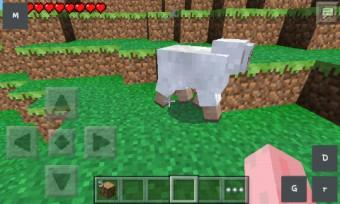

In [ ]:
# Show the output image
from PIL import Image

filename='datasets/minecraft/images/test/-46-_jpg.rf.174ff6d9f9f02a9a84d10ce98fc36abc.jpg'
Image.open(filename)


Получим предсказание модели, отрисуем рамки предсказаний с классом и вероятностью, сохраним результат в папку artifacts/yolo

In [ ]:
current_color = (0, 0, 255)

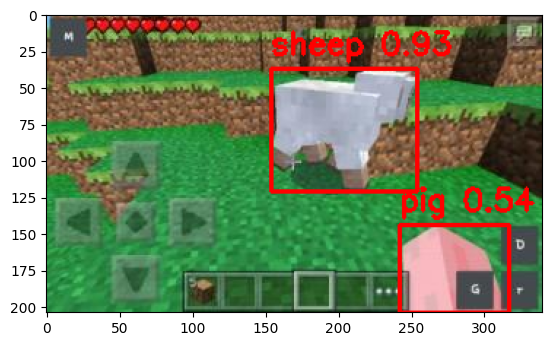

In [ ]:
filename='datasets/minecraft/images/test/-46-_jpg.rf.174ff6d9f9f02a9a84d10ce98fc36abc.jpg'
# Perform inference
img_path = 'datasets/minecraft/images/test/'
img_file='-46-_jpg.rf.174ff6d9f9f02a9a84d10ce98fc36abc.jpg'
filename=img_path + img_file

frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

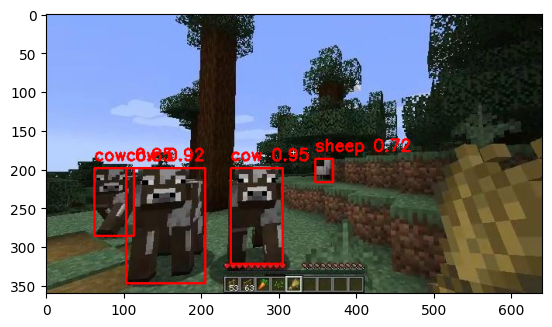

In [ ]:
# Perform inference
img_path = 'datasets/minecraft/images/test/'
img_file='forest_-_cow_3_783_jpg.rf.e04480d4be8fb2a51c522119a5e266d5.jpg'
filename=img_path + img_file

frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

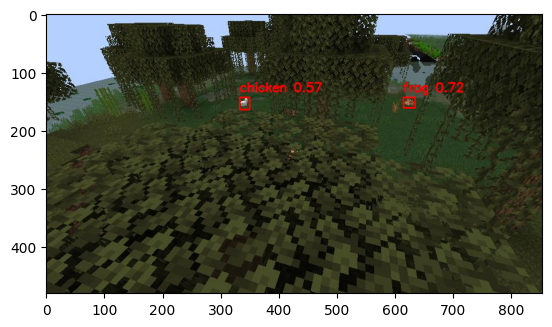

In [ ]:

# Perform inference
img_path = 'datasets/minecraft/images/train/'
img_file='2023-03-27_19_28_38_png.rf.720c362ded136635ea55b02b07cbcaf8.jpg'
filename=img_path + img_file

frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

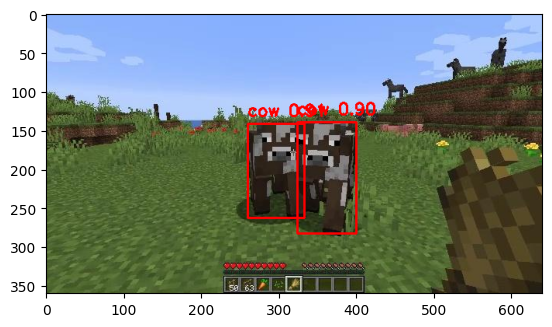

In [ ]:

# Perform inference
img_path = 'datasets/minecraft/images/test/'
img_file='grass_desert_-_cow_3_1213_jpg.rf.d65a530b6d3f30f6709afd51032ae0c6.jpg'
filename=img_path + img_file

frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

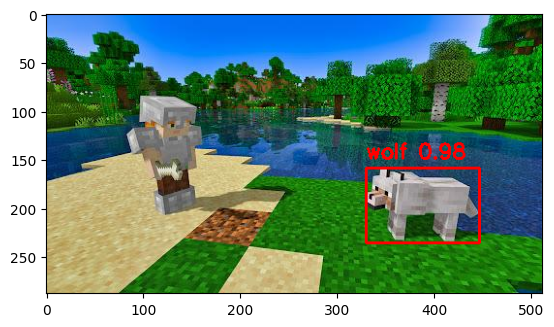

In [ ]:
# Perform inference
img_path = 'datasets/minecraft/images/train/'
img_file='wolf12_jpg.rf.c26d5b06eae27a9ec8f93e9ade0f54dc.jpg'
filename=img_path + img_file

#filename='datasets/minecraft/images/train/Screenshot-10-_png.rf.fd6829f14279dcef0f72f01db178bbba.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=512, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

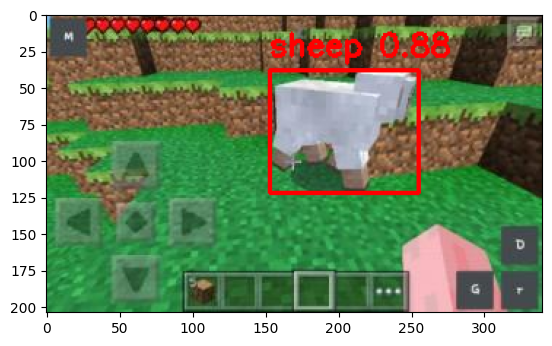

In [ ]:
# Perform inference
img_path = 'datasets/minecraft/images/test/'
img_file='-46-_jpg.rf.174ff6d9f9f02a9a84d10ce98fc36abc.jpg'
filename=img_path + img_file

#filename='datasets/minecraft/images/train/Screenshot-10-_png.rf.fd6829f14279dcef0f72f01db178bbba.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=512, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/resized_'+img_file, dpi=300, bbox_inches='tight')

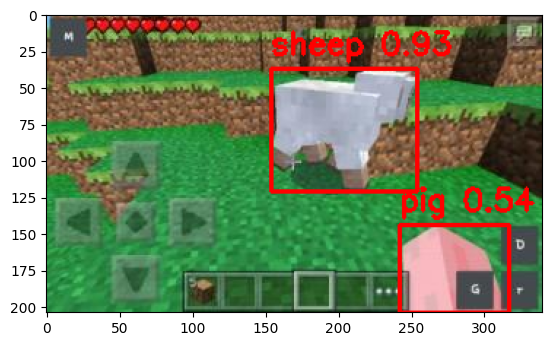

In [ ]:
# Perform inference
img_path = 'datasets/minecraft/images/test/'
img_file='-46-_jpg.rf.174ff6d9f9f02a9a84d10ce98fc36abc.jpg'
filename=img_path + img_file

#filename='datasets/minecraft/images/train/Screenshot-10-_png.rf.fd6829f14279dcef0f72f01db178bbba.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

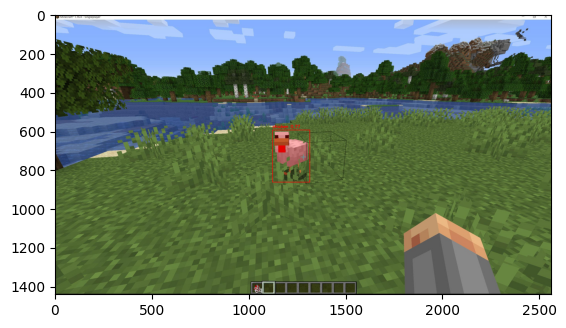

In [ ]:
# Perform inference
img_path = 'datasets/minecraft/images/valid/'
img_file='155_png_jpg.rf.0ed7206ac93e34aa626f0f3a18607169.jpg'
filename=img_path + img_file

#filename='datasets/minecraft/images/train/Screenshot-10-_png.rf.fd6829f14279dcef0f72f01db178bbba.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

In [ ]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.], device='cuda:0')
conf: tensor([0.7663], device='cuda:0')
data: tensor([[1.1200e+03, 5.9639e+02, 1.3122e+03, 8.6436e+02, 7.6630e-01, 1.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1440, 2560)
shape: torch.Size([1, 6])
xywh: tensor([[1216.1266,  730.3732,  192.1533,  267.9666]], device='cuda:0')
xywhn: tensor([[0.4750, 0.5072, 0.0751, 0.1861]], device='cuda:0')
xyxy: tensor([[1120.0499,  596.3899, 1312.2032,  864.3564]], device='cuda:0')
xyxyn: tensor([[0.4375, 0.4142, 0.5126, 0.6002]], device='cuda:0')

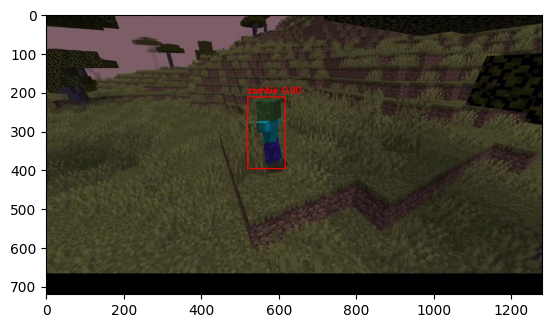

In [ ]:
# Perform inference
img_path = 'datasets/minecraft/images/test/'
img_file='02_savanna_0_19_jpg.rf.283914d75c9387a3a9e5a5eabcde556a.jpg'
filename=img_path + img_file

#filename='datasets/minecraft/images/train/Screenshot-10-_png.rf.fd6829f14279dcef0f72f01db178bbba.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

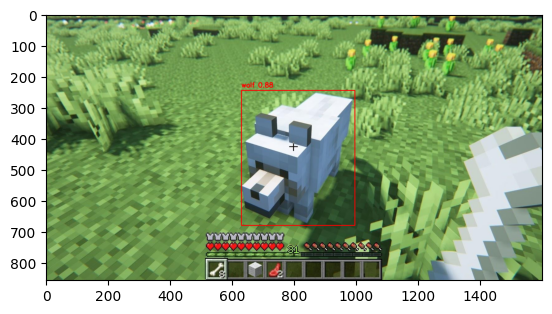

In [ ]:
# Perform inference
img_path = 'datasets/minecraft/images/test/'
img_file='wolf21_jpg.rf.0725f28587c88d80f546cbf3bbdb4c29.jpg'
filename=img_path + img_file

#filename='datasets/minecraft/images/train/Screenshot-10-_png.rf.fd6829f14279dcef0f72f01db178bbba.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

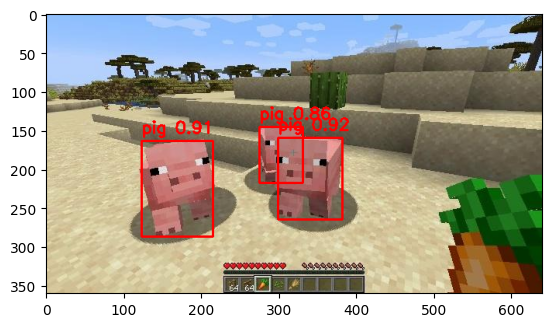

In [ ]:
img_path = './datasets/minecraft/images/valid/'
img_file = 'desert_-_pig_1375_jpg.rf.bddcc2b2bd1ccf7330cd274d684fd4e2.jpg'
filename=img_path + img_file

#filename='datasets/minecraft/images/train/Screenshot-10-_png.rf.fd6829f14279dcef0f72f01db178bbba.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

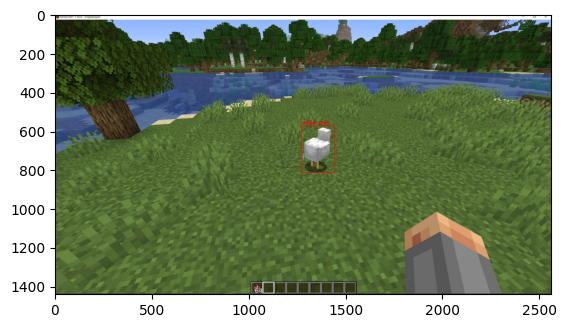

In [ ]:
# Perform inference
img_path = 'datasets/minecraft/images/test/'
img_file='141_png_jpg.rf.69a8f163b53cc59d83501954f60f707a.jpg'
filename=img_path + img_file

#filename='datasets/minecraft/images/train/Screenshot-10-_png.rf.fd6829f14279dcef0f72f01db178bbba.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

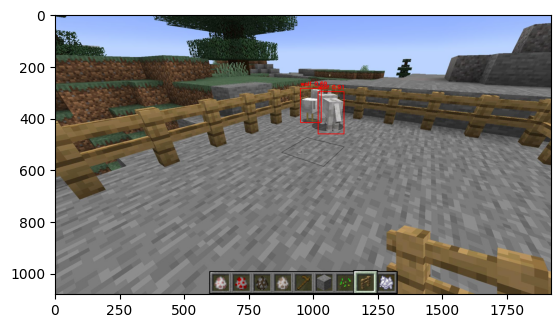

In [ ]:
# Perform inference
img_path = 'datasets/minecraft/images/train/'
img_file = 'Minecraft-1-19-2-2022-11-29-3_44_01_png.rf.ab9bc44577337769e2b9da0bc4e3d6c8.jpg'
filename=img_path + img_file

#filename='datasets/minecraft/images/train/Screenshot-10-_png.rf.fd6829f14279dcef0f72f01db178bbba.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(pltframe);
plt.savefig('artifacts/yolo/'+img_file, dpi=300, bbox_inches='tight')

# Инференс на видео

In [ ]:
import os
import requests
import zipfile
import shutil

# Пути
dataset_dir = 'datasets/minecraft'
video_url = "https://code.s3.yandex.net/deep-learning/video.mp4"
# Скачиваем видео
print("📥 Скачивание видео...")
video_file_path = os.path.join(dataset_dir, 'video.mp4')
response = requests.get(video_url, stream=True)
response.raise_for_status()
with open(video_file_path, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)
print("✅ Видео скачано")


📥 Скачивание видео...
✅ Видео скачано


In [ ]:
import argparse
from tqdm import tqdm

#model = YOLO('last.pt')

input_video_path='/content/mmdetection/datasets/minecraft/video.mp4'
output_video_path='video_out512_yolo_thr03.mp4'
confidence_threshold=0.3
imgsz=512
current_color = (0, 0, 255)

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print(f"Ошибка: не удалось открыть видеофайл {input_video_path}")
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

with tqdm(total=total_frames, desc="Анализ игрового процесса") as pbar:
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        results = model.predict(frame, imgsz=imgsz, conf=confidence_threshold, verbose=False)
        for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

        out.write(frame)
        pbar.update(1)


cap.release()
out.release()
print(f"\nАнализ завершен. Результат сохранен в файл: {output_video_path}")


Анализ игрового процесса: 100%|██████████| 756/756 [00:45<00:00, 16.45it/s]


Анализ завершен. Результат сохранен в файл: video_out512_yolo_thr03.mp4


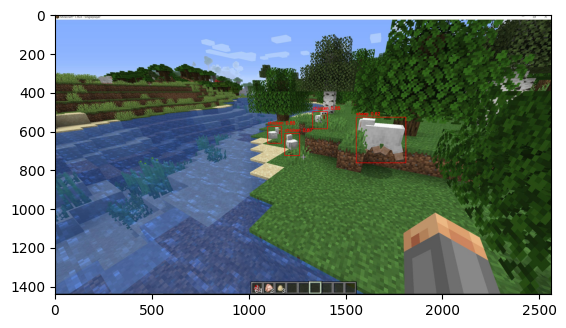

In [ ]:
filename='datasets/minecraft/images/train/163_png_jpg.rf.9a3bde2ed0bbb9f7f78b887e4c273f5d.jpg'
frame = cv2.imread(filename)
results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(frame);

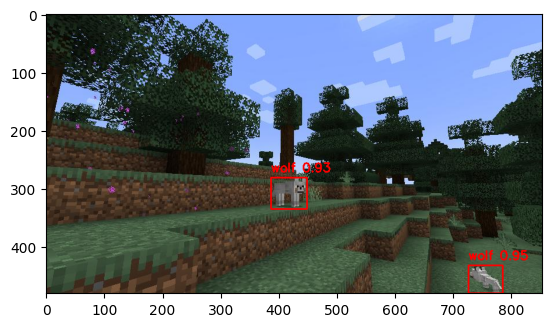

In [ ]:
filename='datasets/minecraft/images/train/2023-04-03_20_03_14_png.rf.3207007583199cc95d73fdb5378abfca.jpg'
frame = cv2.imread(filename)

results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(frame);

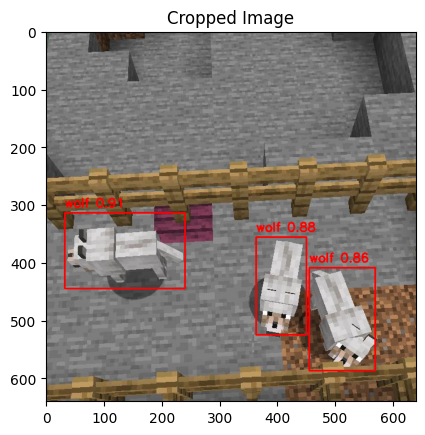

In [ ]:
# Обрезка изображения.Пример кода: cropped_image = img[y:y+h, x:x+w].

cropped = frame[0:640, 600:600+640]
plt.title("Cropped Image")
plt.imshow(cropped);


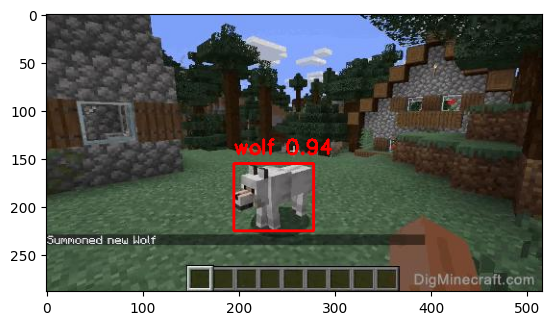

In [ ]:
filename='datasets/minecraft/images/train/wolf13_png.rf.e3c029381756e7daf2ac138335a8e3d2.jpg'
frame = cv2.imread(filename)

results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)

for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
plt.imshow(frame);

In [ ]:
def show_pred(model, frame):
    results = model(frame)
    for r in results:
            for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf, class_id = float(box.conf[0]), int(box.cls[0])
                    label = f"{model.names[class_id]} {conf:.2f}"
                    cv2.rectangle(frame, (x1, y1), (x2, y2), current_color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, current_color, 2)

    pltframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Для корректного отображения цветов
    plt.imshow(pltframe);

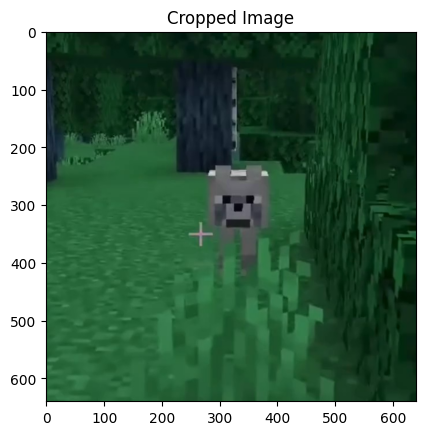

In [ ]:
filename='/content/frame1_video_mp4.jpg'
frame = cv2.imread(filename)

#results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)
cropped = frame[400:400+640, 1200:1200+640]
plt.title("Cropped Image")
plt.imshow(cropped);


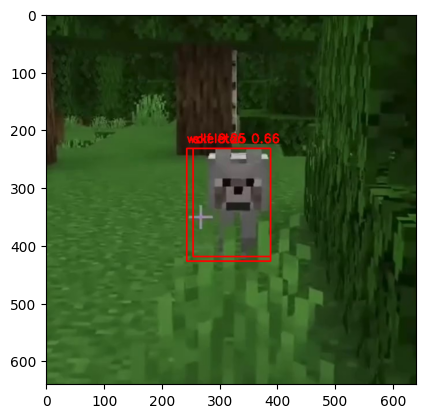

In [ ]:
show_pred(model, cropped)